In [1]:
import sys

import numpy as np
import pandas as pd
import s3fs
import scipy
import seaborn as sns

sys.path.append("/Users/fgu/dev/projects/entropy")
import entropy.data.aggregators as ag
import entropy.data.cleaners as cl
import entropy.data.make_data as md
import entropy.data.selectors as sl
import entropy.data.validators as vl
import entropy.helpers.aws as ha
import entropy.helpers.data as hd
import entropy.helpers.helpers as hh

pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
%load_ext autoreload
%autoreload 2

fs = s3fs.S3FileSystem(profile="3di")

In [2]:
df = hd.read_analysis_data("777")
hd.inspect(df)

Time for read_analysis_data            : 0.95 seconds
(689, 55)


,user_id,month,date,active_accounts,txns_count,txns_value,txn_count_sa,txn_count_ca,nunique_tag,nunique_tag_auto,nunique_merchant,prop_credit,month_income,year_income,has_regular_income,has_month_income,entropy,entropyz,age,female,sa_inflows,has_sa_inflows,has_reg_sa_inflows,has_benefits,has_pension,has_mortgage_pmt,has_rent_pmt,loan_funds,loan_repmt,pdloan_funds,pdloan_repmt,region_name,is_urban,spend_finance,spend_services,spend_other_spend,spend_household,spend_motor,spend_communication,spend_retail,spend_travel,spend_hobbies,month_spend,entropy_tag,entropy_tag_wknd,entropy_tag_smooth,entropy_tag_wknd_smooth,entropy_tag_auto,entropy_tag_auto_wknd,entropy_tag_auto_smooth,entropy_tag_auto_wknd_smooth,entropy_merchant,entropy_merchant_wknd,entropy_merchant_smooth,entropy_merchant_wknd_smooth
0,13777,11,2012-11-30,"[112648, 112650, 112652, 112651]",100,317126.781250,14.0,85.0,7,22,16,0.102756,6.36603,69.89982,0,1,0.827491,0.081098,43.0,0.0,50076.0,1,0,0,0,3.0,3.0,0,0,0,0,south east,0.0,1.15143,0.40366,1.686,6.983816,0.00000,0.0,0.50167,0.1369,0.02500,11.07382,0.745573,0.745699,0.827491,0.871427,0.536612,0.529467,0.952630,0.978862,0.344637,0.359487,0.994527,0.997931
1,13777,12,2012-12-31,"[112648, 112650, 112652, 112651, 112653]",65,34068.792969,8.0,52.0,7,18,15,0.022894,5.28394,69.89982,0,1,0.853535,0.389008,43.0,0.0,3250.0,1,0,0,0,3.0,1.0,0,0,0,0,south east,0.0,0.01353,0.14189,1.030,5.677650,0.20267,0.0,0.18395,0.0000,0.09499,7.34468,0.766642,0.792586,0.853535,0.906167,0.498183,0.511866,0.959639,0.983461,0.344079,0.365153,0.995064,0.998150


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,689.0,350089.046444,150421.954528,13777.000000,296777.000000,392777.000000,418777.000000,5.537770e+05
month,689.0,6.429608,3.458818,1.000000,3.000000,6.000000,9.000000,1.200000e+01
txns_count,689.0,95.433962,41.836810,21.000000,65.000000,89.000000,122.000000,2.670000e+02
txns_value,689.0,18103.332031,64823.820312,1804.689941,5513.630371,9118.849609,15367.629883,1.320082e+06
txn_count_sa,689.0,4.377358,5.549446,0.000000,0.000000,2.000000,6.000000,3.600000e+01
txn_count_ca,689.0,82.370102,36.907502,15.000000,53.000000,79.000000,104.000000,2.500000e+02
nunique_tag,689.0,7.322206,1.149109,3.000000,7.000000,7.000000,8.000000,9.000000e+00
nunique_tag_auto,689.0,18.873730,5.881338,7.000000,14.000000,18.000000,23.000000,3.600000e+01
nunique_merchant,689.0,20.680697,8.477548,4.000000,14.000000,20.000000,25.000000,5.400000e+01
prop_credit,689.0,0.065535,0.151488,0.000000,0.000000,0.000000,0.013856,7.857935e-01


array([[<AxesSubplot:title={'center':'entropy'}>,
        <AxesSubplot:title={'center':'entropyz'}>,
        <AxesSubplot:title={'center':'entropy_tag'}>,
        <AxesSubplot:title={'center':'entropy_tag_wknd'}>],
       [<AxesSubplot:title={'center':'entropy_tag_smooth'}>,
        <AxesSubplot:title={'center':'entropy_tag_wknd_smooth'}>,
        <AxesSubplot:title={'center':'entropy_tag_auto'}>,
        <AxesSubplot:title={'center':'entropy_tag_auto_wknd'}>],
       [<AxesSubplot:title={'center':'entropy_tag_auto_smooth'}>,
        <AxesSubplot:title={'center':'entropy_tag_auto_wknd_smooth'}>,
        <AxesSubplot:title={'center':'entropy_merchant'}>,
        <AxesSubplot:title={'center':'entropy_merchant_wknd'}>],
       [<AxesSubplot:title={'center':'entropy_merchant_smooth'}>,
        <AxesSubplot:title={'center':'entropy_merchant_wknd_smooth'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

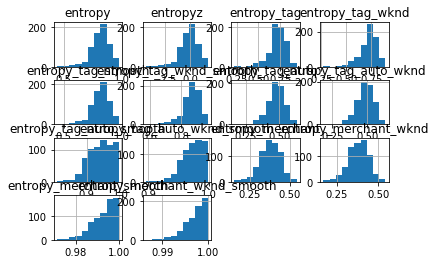

In [5]:
df.filter(like='entropy').hist()